# Data Cleaning Folder

## Importing libraries

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from PIL import Image
import os, sys
import glob
import cv2
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Creando Array & DataFrame

In [4]:
# Open a file
path = "../img/"
dirs = os.listdir(path)

# This would print all Çthe files and directories
for file in dirs:
    print(file)

.DS_Store
chaturanga dandasana
bakasana
ardha matsyendrasana
garudasana
bitilasana
vriksasana


In [5]:
def makeImagDf(path):
    dictionary = {}
    for paths in glob.glob(path):
        dictionary.setdefault('pose', []).append(paths.split('/')[-2])
        dictionary.setdefault('png', []).append(paths.split('/')[-1])
        dictionary.setdefault('path', []).append(paths)
        dictionary.setdefault('array', []).append(cv2.resize(cv2.imread(paths, cv2.IMREAD_GRAYSCALE),(224,224)))
    
    images = pd.DataFrame(dictionary)
    return images

In [6]:
data_ima = makeImagDf('../img/**/*.png')

In [7]:
data_ima.head()

,pose,png,path,array
0,chaturanga dandasana,33-0.png,../img/chaturanga dandasana/33-0.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,chaturanga dandasana,76-0.png,../img/chaturanga dandasana/76-0.png,"[[244, 244, 244, 244, 244, 243, 244, 244, 244,..."
2,chaturanga dandasana,50-2.png,../img/chaturanga dandasana/50-2.png,"[[254, 255, 255, 175, 122, 145, 143, 146, 144,..."
3,chaturanga dandasana,9-0.png,../img/chaturanga dandasana/9-0.png,"[[246, 241, 247, 246, 247, 226, 219, 226, 224,..."
4,chaturanga dandasana,92-0.png,../img/chaturanga dandasana/92-0.png,"[[196, 190, 198, 196, 198, 197, 198, 200, 196,..."


In [8]:
data_ima.pose.unique()

array(['chaturanga dandasana', 'bakasana', 'ardha matsyendrasana',
       'garudasana', 'bitilasana', 'vriksasana'], dtype=object)

In [9]:
type(data_ima.array.values[0])

numpy.ndarray

# Duplicidad de imágenes con flip

In [10]:
data_dup = data_ima.copy()
b = data_ima.array.iloc[4]

In [11]:
#Original multiplicado por dos.
data_ima.pose.value_counts()*2

vriksasana              190
ardha matsyendrasana    178
chaturanga dandasana    176
bitilasana              172
garudasana              154
bakasana                152
Name: pose, dtype: int64

In [12]:
data_dup['array'] = data_dup['array'].apply(lambda x: np.fliplr(x))

In [13]:
#Comprobación de si las imágenes están ok
a = data_dup.array.iloc[4]

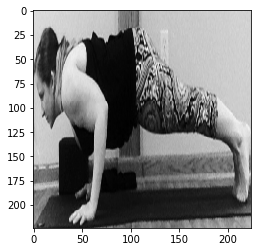

In [14]:
plt.imshow(a,cmap="gray")

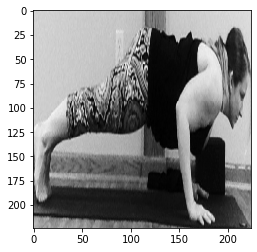

In [15]:
plt.imshow(b,cmap="gray")

In [16]:
definitiva = pd.concat([data_ima,data_dup], ignore_index = True)

In [17]:
definitiva.shape

(1022, 4)

In [18]:
data_ima.shape

(511, 4)

In [19]:
new_dummies = pd.get_dummies(definitiva['pose'])

In [20]:
new_dummies.head()

,ardha matsyendrasana,bakasana,bitilasana,chaturanga dandasana,garudasana,vriksasana
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [21]:
data_new = definitiva.join(new_dummies)
data_new.head()

,pose,png,path,array,ardha matsyendrasana,bakasana,bitilasana,chaturanga dandasana,garudasana,vriksasana
0,chaturanga dandasana,33-0.png,../img/chaturanga dandasana/33-0.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0,0,0,1,0,0
1,chaturanga dandasana,76-0.png,../img/chaturanga dandasana/76-0.png,"[[244, 244, 244, 244, 244, 243, 244, 244, 244,...",0,0,0,1,0,0
2,chaturanga dandasana,50-2.png,../img/chaturanga dandasana/50-2.png,"[[254, 255, 255, 175, 122, 145, 143, 146, 144,...",0,0,0,1,0,0
3,chaturanga dandasana,9-0.png,../img/chaturanga dandasana/9-0.png,"[[246, 241, 247, 246, 247, 226, 219, 226, 224,...",0,0,0,1,0,0
4,chaturanga dandasana,92-0.png,../img/chaturanga dandasana/92-0.png,"[[196, 190, 198, 196, 198, 197, 198, 200, 196,...",0,0,0,1,0,0


In [22]:
data_new.columns

Index(['pose', 'png', 'path', 'array', 'ardha matsyendrasana', 'bakasana',
       'bitilasana', 'chaturanga dandasana', 'garudasana', 'vriksasana'],
      dtype='object')

In [23]:
data_new['gt'] = data_new[['ardha matsyendrasana', 'bakasana','bitilasana','chaturanga dandasana', 'garudasana', 'vriksasana']].apply(lambda x: pd.Series([x.values]), axis=1)
data_new.head(2)

,pose,png,path,array,ardha matsyendrasana,bakasana,bitilasana,chaturanga dandasana,garudasana,vriksasana,gt
0,chaturanga dandasana,33-0.png,../img/chaturanga dandasana/33-0.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"
1,chaturanga dandasana,76-0.png,../img/chaturanga dandasana/76-0.png,"[[244, 244, 244, 244, 244, 243, 244, 244, 244,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"


In [24]:
data_new.shape

(1022, 11)

In [25]:
data_new.dtypes

pose                    object
png                     object
path                    object
array                   object
ardha matsyendrasana     uint8
bakasana                 uint8
bitilasana               uint8
chaturanga dandasana     uint8
garudasana               uint8
vriksasana               uint8
gt                      object
dtype: object

## Importing the new DataFrame

In [26]:
data_new.to_pickle("todos.pkl")

# Imágenes (sample)

In [27]:
# pasar las fotos a un mismo tamaño
X = np.stack(data_new['array'])

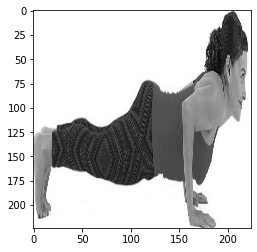

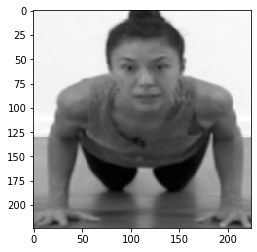

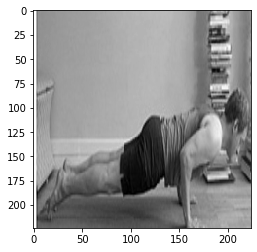

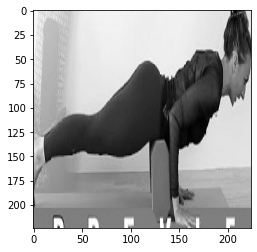

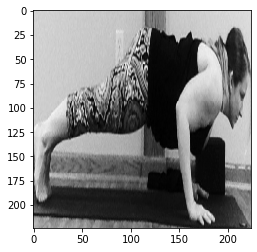

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
columns = 5
for i in range(columns):
    plt.figure()
    im = X[i]
    plt.imshow(im,cmap="gray")